In [31]:
import pandas as pd
import numpy as np

# Paths
vari_super_s1 = 'Measurements/vari_super_s1.csv'
vari_super_s2 = 'Measurements/vari_super_s2.csv'
vari_precog_s1 = 'Measurements/vari_precog_s1.csv'
vari_precog_s2 = 'Measurements/vari_precog_s2.csv'
vari_precog_s3 = 'Measurements/vari_precog_s3.csv'
vari_nymz = 'Measurements/vari_nymz.csv'
vari_hobbytalk_stock = 'Measurements/vari_hobbytalk_stock.csv'
vari_hbb = 'Measurements/vari_hbb.csv'
vari_harpo = 'Measurements/vari_harpo.csv'
vari_gizaudio = 'Measurements/vari_gizaudio.csv'
vari_crinacle = 'Measurements/vari_crinacle.csv'
vari_aftersound = 'Measurements/vari_aftersound.csv'
CammyFi = 'Measurements/CammyFi.csv'
BryAudioReviews = 'Measurements/BryAudioReviews.csv'
Vari_105dBC = 'Measurements/Vari_105dBC.csv'
Vari_85dBC = 'Measurements/Vari_85dBC.csv'
Vari_77dBC = 'Measurements/Vari_77dBC.csv'
Moondrop_Measurement_Official = 'Measurements/Moondrop_Measurement_Official.csv'


# List of file paths
file_paths = [vari_super_s1, vari_super_s2, vari_precog_s1, vari_precog_s2, vari_precog_s3, vari_nymz, vari_hobbytalk_stock, vari_hbb, vari_harpo, vari_gizaudio, vari_crinacle, vari_aftersound, CammyFi, BryAudioReviews, Vari_105dBC, Vari_85dBC, Vari_77dBC, Moondrop_Measurement_Official]

# Function to read and interpolate data
def read_and_interpolate(file_path, x_values):
    df = pd.read_csv(file_path)
    df = df.drop_duplicates(subset='X', keep='first')  # Drop duplicate X values
    df = df.set_index('X')
    df = df.reindex(df.index.union(x_values)).interpolate(method='linear')
    df = df.loc[x_values]
    return df

# Define common X-axis
x_values = np.linspace(21, 20000, 19980)  # Change the number of data points as needed

# Read and interpolate all .csv files
dfs = [read_and_interpolate(file_path, x_values) for file_path in file_paths]

# Calculate average
average_df = pd.concat(dfs).groupby(level=0).mean()

# Save the average to a new .csv file
average_df.to_csv('Measurements/average.csv', index_label='X')


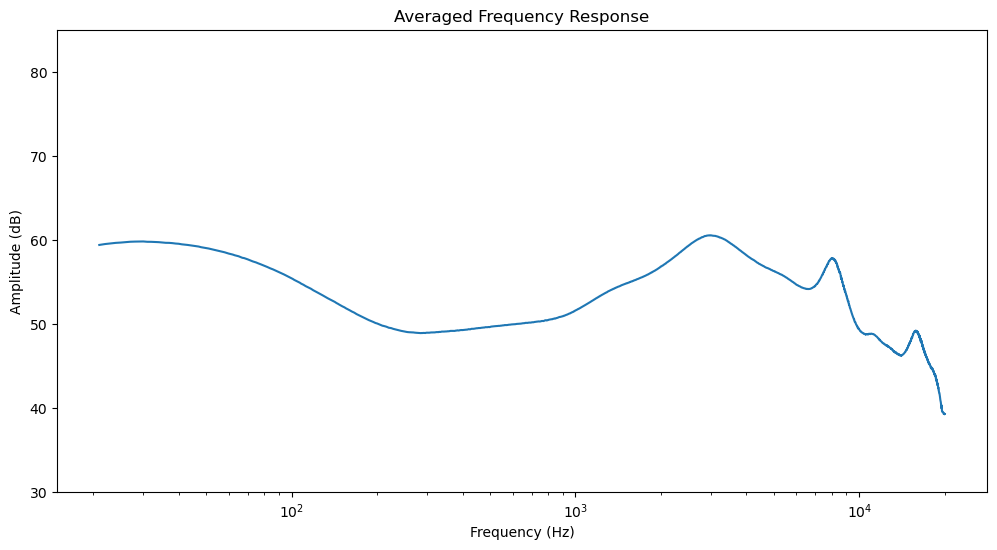

In [32]:
import matplotlib.pyplot as plt

# Load the averaged data
average_df = pd.read_csv('Measurements/average.csv')

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 6))

# Create a plot of the data with a logarithmic X-axis
plt.semilogx(average_df['X'], average_df['Y'])

# Set the Y-axis range
plt.ylim(30, 85)

# Add labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Averaged Frequency Response')

# Display the plot
plt.show()


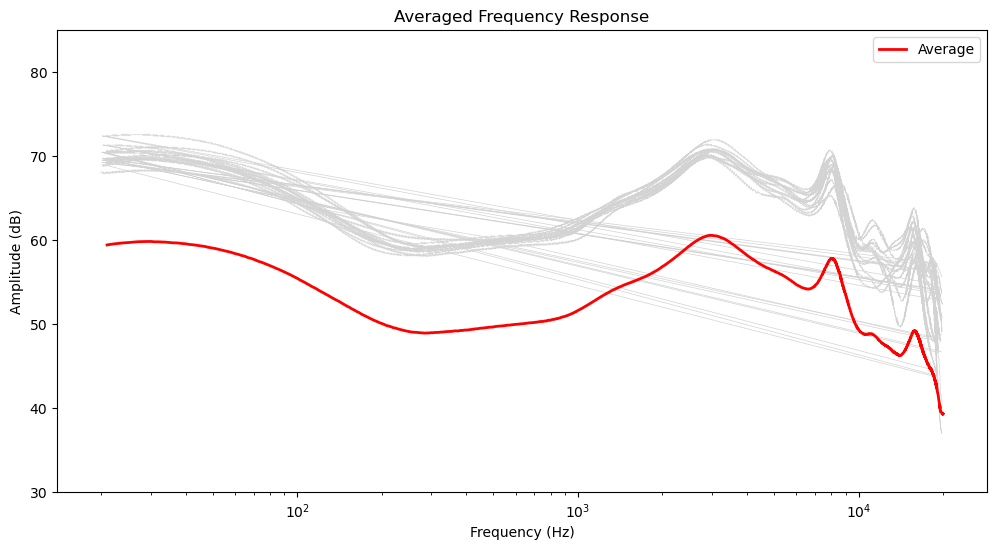

In [33]:
import matplotlib.pyplot as plt

# Function to plot individual .csv file data
def plot_individual_data(file_path):
    df = pd.read_csv(file_path)
    plt.semilogx(df['X'], df['Y'], color='lightgray', linewidth=0.5)

# Load the averaged data
average_df = pd.read_csv('Measurements/average.csv')

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 6))

# Plot individual .csv files
for file_path in file_paths:
    plot_individual_data(file_path)

# Create a plot of the averaged data with a logarithmic X-axis
plt.semilogx(average_df['X'], average_df['Y'], color='red', linewidth=2, label='Average')

# Set the Y-axis range
plt.ylim(30, 85)

# Add labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Averaged Frequency Response')

# Add a legend
plt.legend()

# Display the plot
plt.show()
